# Credit Card Default Rates - Analysis 

This project looks at a dataset that attempts to understand probability of credit card defaults based on various factors such as age, gender, relationship status, and education. The dataset also looks at other variety of data such as payments and bill amounts as well. 

In this project, I have attempted to analyze data provided to answer these questions below:

1. Is there a correlation between social factors age / gender/ education / relationship status and default rates? Is one group more likely to default than others?

2. Does limit balance play a factor in default rates? Are customers with a lower balance more likely to default than customers with higher balances? Also, who gets more limit balances by age groups?

3. Can bill amount predict default rates? Does a high bill amount lead to higher default rates?

To answer these questions above. I will use various statistical tools and analysis. I will begin by summarizing and highlighting the main portions of the dataset and will follow that by answering each questions above. 

## Highlights of Dataset: 

The dataset contains over 30,000 customers. The social background of customers are provided under these factors: gender, age, education, and relationship status. 

Each customer's limit balance given by the bank is also provided. Their payments history and balance history is also provided. 

In addition, the dataset also predicts if a customer will default or not which is listed as 0 = Default, 1 = No Default. 

    1. Number of Customers: 30,000 
    2. Mean Age of Customers: 35 
    3. Male Customers: 11,888
    4. Female Customers: 18,112
    5. Most common limit amount: 50,000 (over 3365 customers have this limit) 
    6. Most common age group: 29 years old (over 1605 customers are this age) 
    7. Highest limit: 1,000,000 
    8. Lowest limit: 10,000
    9. Mean Limit: 167,484
    10. Median Limit: 140,000
    11. Standard Deviation: 129,748 (really high)
    12. # of Customers that default: 6,636 
    13. # of Customers who don't default: 23,364
    14. Percentage of Default: 0.284

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy

In [2]:
pwd

'/Users/ijyapaudel/Desktop/Thinkful/Capstone Project'

In [3]:
cc_df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [5]:
cc_df['AGE'].aggregate(np.mean)
cc_df['AGE'].value_counts()
#most of the users are aged 29 with the highest # of users. The user group is mostly from age 25 - 35
cc_df['AGE'].value_counts().head(10)
#1 is male and 2 = female 
cc_df[['SEX', 'default.payment.next.month']]
#default chances are 6636 compared to 23364 customers not defaulting 
cc_df['default.payment.next.month'].value_counts()
# female users = 18,112 compared to 11,888 male users 
cc_df['SEX'].value_counts()
#average amount of limits 
cc_df['LIMIT_BAL'].aggregate(np.mean)
# median amount of limits 
cc_df['LIMIT_BAL'].aggregate(np.median)
# max limit for any customer is 1,000,000 
cc_df['LIMIT_BAL'].aggregate(np.max)
# min limit for any customer 
cc_df['LIMIT_BAL'].aggregate(np.min)
#median limit for any customer 
cc_df['LIMIT_BAL'].aggregate(np.median)
#Standard deviation is quite large....? 
cc_df['LIMIT_BAL'].aggregate(np.std)
# majority of customers have 50,000 as their limits 
cc_df['LIMIT_BAL'].value_counts().head(10)

cc_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [6]:
default_graph = cc_df['default.payment.next.month'].value_counts()
default_graph

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

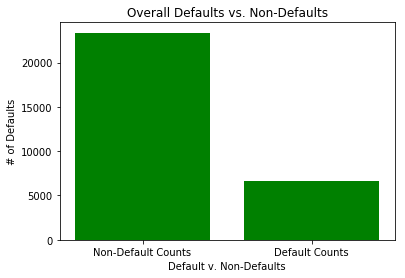

In [7]:
height = default_graph
bars = ('Non-Default Counts', 'Default Counts')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'green')
plt.title('Overall Defaults vs. Non-Defaults')
plt.xlabel('Default v. Non-Defaults')
plt.ylabel('# of Defaults')
plt.xticks(y_pos, bars)
plt.show()


# Gender Based Analysis: 

Here I will talk more in regards to gender and how it plays into the default rates. The majority of customers are female customers (18,112) compared to (11,888) male customers. The first analysis, I did was look at the central tendency of the default rates for each gender:

Female Statistics: 

    # of Female Customers: 18,112 
    Mean age: 35 
    Mean Limit: 170,086
    Standard Deviation of Limits: 125,231
    Default Percentage: .2077
    Standard Deviation of Default: 0.405 
    
Male Statistics: 

    # of Male Customers: 11,888 
    Mean age: 36
    Mean Limit: 163,519
    Standard Deviation of Limits: 136,250
    Default Percentage: .2417
    Standard Deviation of Default: 0.428

An independent sampels t-test was used to check if the data is statistically relevant. 

    Diff in Standard Deviation: 
    Sample size = 30,000
    Standard Error = 0.003405332662389708
    Diff in Std Deviation: 0.033909465375304954
    T-Value: 9.95775412775938 
    P-Value: 0.000000000007562495588453789


 

True     18112
False    11888
Name: SEX, dtype: int64


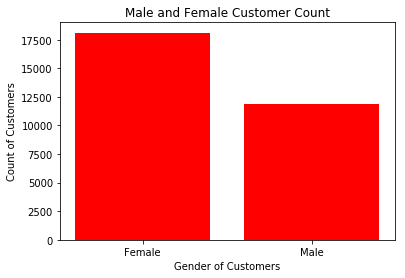

In [8]:
fem = cc_df['SEX'] == 2 
male = cc_df['SEX'] == 1
fem_count = fem.value_counts()
print(fem_count)
height = fem_count
bars = ('Female', 'Male')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'red')
plt.title('Male and Female Customer Count')
plt.xlabel ('Gender of Customers')
plt.ylabel('Count of Customers')
plt.xticks(y_pos, bars)
plt.show()


In [9]:
fem_stats = cc_df['SEX'] == 2

In [10]:
#defaults or non-defaults for female customers 
default_fem = cc_df.loc[cc_df['SEX'] == 2, 'default.payment.next.month']
#defaults or non-defaults for male customers 
default_male = cc_df.loc[cc_df['SEX'] == 1, 'default.payment.next.month']
default_male.describe()


count    11888.000000
mean         0.241672
std          0.428115
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

In [11]:
default_fem.describe()

count    18112.000000
mean         0.207763
std          0.405717
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

In [12]:
sum_fem = cc_df.loc[cc_df['SEX'] == 2, 'AGE']
sum_fem.describe()

count    18112.000000
mean        34.806868
std          9.029441
min         21.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

In [13]:
sum_male = cc_df.loc[cc_df['SEX'] == 1, 'AGE']
sum_male.describe()

count    11888.000000
mean        36.519431
std          9.404555
min         21.000000
25%         29.000000
50%         35.000000
75%         43.000000
max         79.000000
Name: AGE, dtype: float64

# Is Default Rate showing males are more likely to default than female statistically relevant?

Yes, because the p-value is really low here. This shows these rates would be consistent with the larger population and is not random. 

    P-Value : 0.000000000007562495588453789 


   

In [14]:
#T-Test 
size = np.array([len(default_fem), len(default_male)])
sd = np.array([default_fem.std(), default_male.std()])
print(sd)
diff = default_male.mean() - default_fem.mean()
print(diff)
diff_se = (sum(sd**2 / size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(default_male, default_fem, equal_var = False))


[0.40571728 0.42811471]
0.033909465375304954
0.004950320184075638
6.849953965480072
Ttest_indResult(statistic=6.849953965480072, pvalue=7.562495588453789e-12)


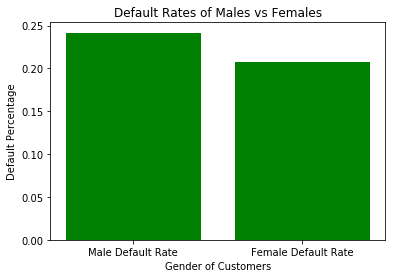

In [15]:
height = default_male.mean(), default_fem.mean()
bars = ('Male Default Rate', 'Female Default Rate')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'green')
plt.title('Default Rates of Males vs Females')
plt.xlabel('Gender of Customers')
plt.ylabel('Default Percentage')
plt.xticks(y_pos, bars)
plt.show()

# Age Based Analysis - Evaluating early age group vs. mid age group

Here I will look into different age groups. 

Histogram Analysis:

Age is more skewed to the left of the graph showing most customer are in range of late twenties to mid thirties. It also shows that the mean age is 35 years old and median age is 34 years old. The standard deviation is 9. 

    Mean age: 35
    Median age: 34
    Most customers: Late Twenties to Mid Thirties 
    

To analyze age defaults properly, I divided age into four groups: Early Age (20s to 30), Mid Age (31 - 40), Old age (41 - 50) and Senior (51 and Older) 

Early Age (20s to 30s)

        # of Customers: 11,013 
        Default Percentage: 0.2242 (sample % = 0.284) 
        Mean: 0.2242
        Standard Deviation: 0.417 
     
Mid Age (30s to 40s):
     
        # of Customers: 10,713 
        Default Percentage: 0.204 (sample % 0.284)
        Mean: 0.204
        Standard Deviation: 0.403 
         
In comparison to mid age / early age customers - mid age customers seem to have a lower default rate compared to their younger counterparts. In surface, it seems more resonable to engage with customers that are aged 31 to 40 compared to early 20s to 30s. 


In [16]:
age = cc_df['AGE']

In [17]:
age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

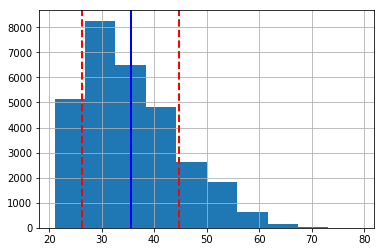

In [18]:
age.hist()
plt.axvline(age.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(age.mean() + age.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(age.mean() - age.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

In [19]:
early_age_default = cc_df.loc[cc_df['AGE'] <= 30, 'default.payment.next.month']

In [20]:
early_age = cc_df.loc[cc_df['AGE'] <= 30, 'LIMIT_BAL']
early_age.describe()

count     11013.000000
mean     132490.692818
std      109893.444864
min       10000.000000
25%       50000.000000
50%      100000.000000
75%      200000.000000
max      750000.000000
Name: LIMIT_BAL, dtype: float64

In [21]:
early_age_graph = early_age_default.value_counts()

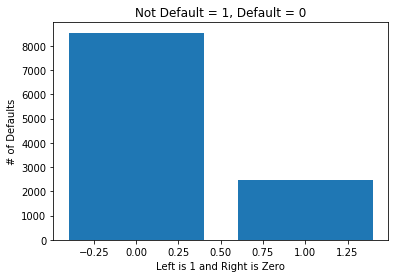

In [22]:
plt.bar(x = early_age_graph.index, height = early_age_graph)
plt.title('Not Default = 1, Default = 0')
plt.xlabel('Left is 1 and Right is Zero')
plt.ylabel('# of Defaults')
plt.show()

In [23]:
early_age_graph
per_default = 2471/11013
print(per_default)

0.22437119767547445


In [24]:
early_age_default.describe()

count    11013.000000
mean         0.224371
std          0.417186
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

In [25]:
mid_age_default = cc_df.loc[cc_df['AGE'].between(31, 40, inclusive = True),'default.payment.next.month']
mid_age_default.describe()

count    10713.000000
mean         0.204331
std          0.403231
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default.payment.next.month, dtype: float64

# Is the default rate between early age group / middle age group statistically significant? 

Yes, I would say the difference is statistically significant because the p-value is lower than 0.5. 

    P-value:  0.00031843522886743493

In [26]:
#T-Test 
early_mid_size = np.array([len(early_age_default), len(mid_age_default)])
sd = np.array([early_age_default.std(), mid_age_default.std()])
print(sd)
diff = early_age_default.mean() - mid_age_default.mean()
print(diff)
diff_se = (sum(sd**2 / early_mid_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(early_age_default, mid_age_default, equal_var = False))

[0.41718649 0.40323086]
0.0200400112664387
0.005566050949910206
3.6004002562646313
Ttest_indResult(statistic=3.6004002562646313, pvalue=0.00031843522886743493)


# Age Based Analysis - Evaluating old age group vs. senior age group

To analyze age defaults properly, I divided age into four groups: Early Age (20s to 30), Mid Age (31 - 40), Old age (41 - 50) and Senior (51 and Older). The early age group and middle age group were discussed above. 

Here I will look at Old Age Group (41 to 50) and Senior Age Group (50 and older). 

Old Age (41s to 50s)

        # of Customers: 6,005
        Default Percentage: 0.2329 (sample % = 0.284) 
        Mean: 0.2329
        Standard Deviation: 0.4228 
     
Senior Age (50s and Older):
     
        # of Customers: 2,269
        Default Percentage: 0.2542 (sample % 0.284)
        Mean: 0.2542
        Standard Deviation: 0.4355 
         
In comparison to old age customers vs. senior age customers - the default percentage of seniors is higher than old age customers. Next, we will evaluate if this is statistically relevant


In [27]:
old_age_default = cc_df.loc[cc_df['AGE'].between(41, 50, inclusive = True),'default.payment.next.month']
old_age_default.describe()

count    6005.000000
mean        0.232973
std         0.422760
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default.payment.next.month, dtype: float64

In [28]:
senior_age_default = cc_df.loc[cc_df['AGE'] >= 51,'default.payment.next.month']
senior_age_default.describe()

count    2269.000000
mean        0.254297
std         0.435561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: default.payment.next.month, dtype: float64

# Is the default rate between old age group / senior age group statistically significant? 

Yes, I would say this is not statistically significant because the number is really close to 0.05 hence, making the data more likely to be out of random chances rather than actual probability of the default rate

    P-value:  0.04527 

In [29]:
#T-Test 
old_senior_size = np.array([len(old_age_default), len(senior_age_default)])
sd = np.array([old_age_default.std(), senior_age_default.std()])
print(sd)
diff = senior_age_default.mean() - old_age_default.mean()
print(diff)
diff_se = (sum(sd**2 / old_senior_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(old_age_default, senior_age_default, equal_var = False))

[0.42276008 0.43556133]
0.021324524259752675
0.010647723525186155
2.00273083812813
Ttest_indResult(statistic=-2.00273083812813, pvalue=0.045273900310890104)


# Comparing the highest default rate vs. the lowest one - statistically relevant? 

The % of defaults based on age groups ranking from highest to lowest:

    Senior Age Group: .2543 
    Old Age Group: .2337
    Early Age Group: .2243
    Mid Age Group: .2004
    

Yes, these are statistically relevant considering the low p-value: 0.0000005257364223306013


In [30]:
#T-Test 
mid_senior_size = np.array([len(senior_age_default), len(mid_age_default)])
sd = np.array([senior_age_default.std(), mid_age_default.std()])
print(sd)
diff = senior_age_default.mean() - mid_age_default.mean()
print(diff)
diff_se = (sum(sd**2 / mid_senior_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(senior_age_default, mid_age_default, equal_var = False))

[0.43556133 0.40323086]
0.04996586074830228
0.009939240607994301
5.027130614799071
Ttest_indResult(statistic=5.027130614799071, pvalue=5.257364223306013e-07)


# Default rates based on education:

Our dataset has different education levels starting with 1 = Graduate Degree, 2 = University, 3 = High School, and 4 = Other. Graduate is the highest degree and High School is the lowest. Other is not defined so, is excluded here for analysis. 

## From initial finding - it looks like default rates goes down as education goes up. See bar graph below.

It appears that higher education leads to a lower default rate as shown by the bar graph below. For our purposes, I am ignoring the "other" field as the dataset doesn't signify what "other" is - it may indicate degree higher than graduate degree (PhD, MD, JD etc) or maybe lower than high school. If we ignore the "other" - we can see that default rate decrease as education level increase. 

## To test the significance of this, I will be comparing the highest degree (Graduate) with lowest degree (High School) to see if it is statistically significant. 

From the t-test, we can see that this is significant based on the p-value:

    P-Value: 4.591193167679487e-16



In [31]:
edu_default = cc_df[['LIMIT_BAL', 'EDUCATION', 'default.payment.next.month']]
grad_def = cc_df.loc[cc_df['EDUCATION'] == 1, 'default.payment.next.month']
univ_def= cc_df.loc[cc_df['EDUCATION'] == 2, 'default.payment.next.month']
hs_def= cc_df.loc[cc_df['EDUCATION'] == 3, 'default.payment.next.month']
other_def = cc_df.loc[cc_df['EDUCATION'] == 4, 'default.payment.next.month']

In [32]:
grads = cc_df.loc[cc_df['EDUCATION'] == 1]
hs = cc_df.loc[cc_df['EDUCATION'] == 3]
count_grad = (len(grads))
count_hs = (len(hs))
print(count_grad)
print(count_hs)

10585
4917


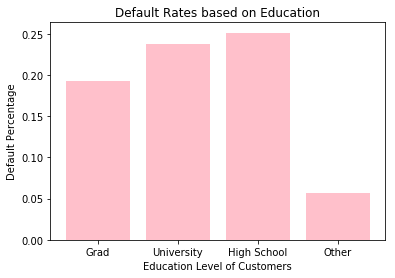

In [33]:
height = grad_def.mean(), univ_def.mean(), hs_def.mean(), other_def.mean()
bars = ('Grad', 'University', 'High School', 'Other')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'pink')
plt.title('Default Rates based on Education')
plt.xlabel('Education Level of Customers')
plt.ylabel('Default Percentage')
plt.xticks(y_pos, bars)
plt.show()

In [34]:
#T-Test 
edu_size = np.array([len(grad_def), len(hs_def)])
sd = np.array([grad_def.std(), hs_def.std()])
print(sd)
diff = grad_def.mean() - hs_def.mean()
print(diff)
diff_se = (sum(sd**2 / edu_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(grad_def, hs_def, equal_var = False))

[0.39416331 0.43396302]
-0.05922850254229661
0.007278625445179357
-8.137319743733169
Ttest_indResult(statistic=-8.137319743733169, pvalue=4.591193167679487e-16)


# Default rates based on relationship status:

Our dataset has 3 relationship status: 1 = Married, 2 = Single, and 3 = Others. We are looking at if a person's relationship status determines their default rates below. 

There are higher amount of Single customers than Married customers. As Others is not described, I am excluding it from the analysis. It may mean divorced or in a relationship so, it is unclear. 

## After we exclude the "other" group - we can see that default rates is higher among married customers compared to single customers. We will now see if this is statistically relevant.

Through a T-Test, we can see that this is statistically relevant.

    P-Value: 1.5781118577956158e-07



In [35]:
rel_default = cc_df[['LIMIT_BAL', 'MARRIAGE', 'default.payment.next.month']]
married_def = cc_df.loc[cc_df['MARRIAGE'] == 1, 'default.payment.next.month']
single_def= cc_df.loc[cc_df['MARRIAGE'] == 2, 'default.payment.next.month']
other_def= cc_df.loc[cc_df['MARRIAGE'] == 3, 'default.payment.next.month']
married = cc_df.loc[cc_df['MARRIAGE'] == 1]
single = cc_df.loc[cc_df['MARRIAGE'] == 2]
other_rel = cc_df.loc[cc_df['MARRIAGE'] == 3]
married_count = (len(married))
single_count = (len(single))
other_rel_count = (len(other_rel))
print(married_count)
print(single_count)
print(other_rel_count)

13659
15964
323


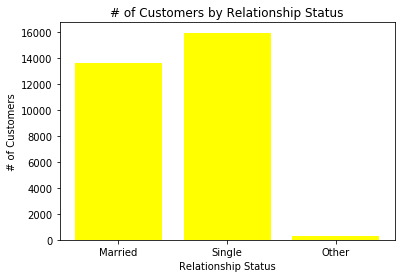

In [36]:
height = married_count, single_count, other_rel_count
bars = ('Married', 'Single', 'Other')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'yellow')
plt.title('# of Customers by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('# of Customers')
plt.xticks(y_pos, bars)
plt.show()

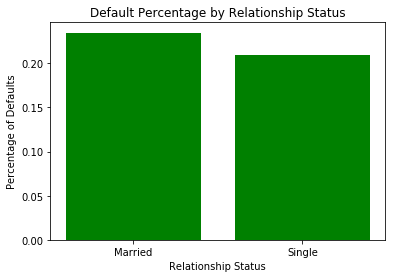

In [37]:
height = married_def.mean(), single_def.mean()
bars = ('Married', 'Single')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = 'green')
plt.title('Default Percentage by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Percentage of Defaults')
plt.xticks(y_pos, bars)
plt.show()

In [38]:
#T-Test 
rel_size = np.array([len(married_def), len(single_def)])
sd = np.array([married_def.std(), single_def.std()])
print(sd)
diff = married_def.mean() - single_def.mean()
print(diff)
diff_se = (sum(sd**2 / rel_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(married_def, single_def, equal_var = False))

[0.42383735 0.40680981]
0.025433648764115607
0.004849571399149833
5.244514756205944
Ttest_indResult(statistic=5.244514756205944, pvalue=1.5781118577956158e-07)


# Question # 2: Does limit balance play a factor in default rates?  

Are customers with a lower balance more likely to default than customers with higher balances? 

Here I will look at limit balance and see if limit balances play a factor in default rates. For example, are customers with lower balances more likely to default than customers with higher balances? 

To do this, I will first look at if customers of a certain age have a higher limit balance and compare that to the age group's default rates. 

Overall Limit Stats:

    Mean: 167,484
    Std: 129,747
    Min: 10,000
    Max: 1,000,000 
    
    
Early Age Limit Stats (20s to 30s):
Default Rate: .2243

    Mean: 132,491
    Std: 109,893
    Min: 10,000
    Max: 750,000
    
Mid Age Limit Stats (30s to 40s): 
Default Rate: .2004

    Mean: 192,272
    Std: 132,688
    Min: 10,000
    Max: 750,000

## Are limit balances higher in one group than another?

Here, we can see that middle age group has a higher limit balance average. They also have a lower default rate compared to the early age group. We will check if that is statistically relevant below.


In [39]:
age_limit = cc_df[['AGE', 'LIMIT_BAL', 'default.payment.next.month']]
limit_age = age_limit['LIMIT_BAL']
limit_age.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

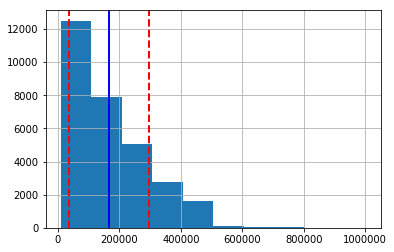

In [40]:
limit_age.hist()
plt.axvline(limit_age.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(limit_age.mean() + limit_age.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(limit_age.mean() - limit_age.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

In [41]:
early_age = cc_df.loc[cc_df['AGE'] <= 30, 'LIMIT_BAL']
early_age.describe()

count     11013.000000
mean     132490.692818
std      109893.444864
min       10000.000000
25%       50000.000000
50%      100000.000000
75%      200000.000000
max      750000.000000
Name: LIMIT_BAL, dtype: float64

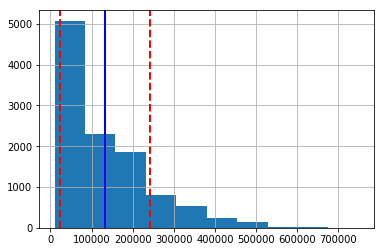

In [42]:
early_age.hist()
plt.axvline(early_age.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(early_age.mean() + early_age.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(early_age.mean() - early_age.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()
plt.show()

In [43]:
mid_age_limit = cc_df.loc[cc_df['AGE'].between(31, 40, inclusive = True),'LIMIT_BAL']
mid_age_limit.describe()

count     10713.000000
mean     197271.539251
std      132688.333009
min       10000.000000
25%       80000.000000
50%      180000.000000
75%      280000.000000
max      750000.000000
Name: LIMIT_BAL, dtype: float64

## It looks like higher limit balance correlates to lower default rate in age groups early v. mid age. 

## Does higher limit balance mean lower chances of default as found in early age v. mid age? 

## If so, is that statistically relevant? 

From above, we can see that the early age group has a higher default rate of .2243 and a lower mean limit balance compared to the middle age group with a default rate of .2004 and a higher limit balance mean. From this alone, we can possibly infer that higher limit balance means lower default rate. 

Let's check that with a T-Test:

P-Value = 0.0

We can conclude that we do not have sufficient information to be able to analyze if this data is statistically significant. We can check again by comparing old age v. senior age. 



In [44]:
#T-Test 
early_mid_size = np.array([len(early_age),len(mid_age_limit)]) 
sd = np.array([early_age.std(), mid_age_limit.std()])
print(sd)
diff = mid_age_limit.mean() - early_age.mean()
print(diff)
diff_se = (sum(sd ** 2 / early_mid_size)) ** 0.5 
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(early_age, mid_age_limit, equal_var = False))

[109893.4448642  132688.33300863]
64780.84643379762
1655.2993500629498
39.13542673192861
Ttest_indResult(statistic=-39.13542673192861, pvalue=0.0)


## Again, we see that in old age v. senior age - the group with the higher limit balance has a lower default percentage. Is that statistically relevant?

According to our calculations, old age customers have a default rate of 0.2329 while seniors have a default rate of .2542. The old age limit mean is 179,680 compared to senior age limit mean of 164,416. This shows that higher limit coorelates with lower default rate in this case as well.

This is statistically relevant as the p-value is really low:

    P-Value: 9.531979128360559e-06
    

In [45]:
old_age_limit = cc_df.loc[cc_df['AGE'].between(41, 50, inclusive = True),'LIMIT_BAL']
old_age_limit.describe()

count       6005.000000
mean      179680.213156
std       138349.572263
min        10000.000000
25%        50000.000000
50%       150000.000000
75%       260000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

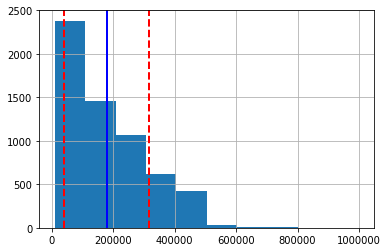

In [46]:
old_age_limit.hist()
plt.axvline(old_age_limit.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(old_age_limit.mean() + old_age_limit.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(old_age_limit.mean() - old_age_limit.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()
plt.show()

In [47]:
senior_age_limit = cc_df.loc[cc_df['AGE'] >= 51,'LIMIT_BAL']
senior_age_limit.describe()

count      2269.000000
mean     164416.042309
std      140240.960525
min       10000.000000
25%       50000.000000
50%      120000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

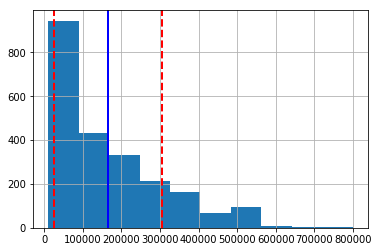

In [48]:
senior_age_limit.hist()
plt.axvline(senior_age_limit.mean(), color = 'b', linestyle = 'solid', linewidth = 2)
plt.axvline(senior_age_limit.mean() + senior_age_limit.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.axvline(senior_age_limit.mean() - senior_age_limit.std(), color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()
plt.show()

In [49]:
#T-Test 
old_senior_size = np.array([len(senior_age_limit), len(old_age_limit)])
sd = np.array([senior_age_limit.std(), old_age_limit.std()])
print(sd)
diff = senior_age_limit.mean() - old_age_limit.mean()
print(diff)
diff_se = (sum(sd**2 / old_senior_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(senior_age_limit, old_age_limit, equal_var = False))

[140240.96052454 138349.57226337]
-15264.170846316207
3443.1630475202287
-4.433182697319398
Ttest_indResult(statistic=-4.433182697319398, pvalue=9.531979128360559e-06)


## The ages groups that have a higher balance have lower default rates as shown by the two comparisons above between (early age v. mid age) and (old age v. seniors). 

## For further analysis , let's compare the highest default rate (seniors) vs. lowest default rate (mid age). From a T-Test, we can also see that this is statistically relevant: 

    Senior Default Rate: .2542
    Mid Age Default Rate: .2004
    Senior Limit Balance: 164,416
    Mid Age Limit Balance: 197,271 

This appears to be statistically relevant, as p-value is really low.

    P-Value: 3.370147322947796e-24 

In [50]:
#T-Test 
senior_mid_size = np.array([len(senior_age_limit), len(mid_age_limit)])
sd = np.array([senior_age_limit.std(), mid_age_limit.std()])
print(sd)
diff = senior_age_limit.mean() - mid_age_limit.mean()
print(diff)
diff_se = (sum(sd**2 / senior_mid_size))** 0.5
print(diff_se)
t_val = diff/diff_se
print(t_val)
from scipy.stats import ttest_ind
print(ttest_ind(senior_age_limit, mid_age_limit, equal_var = False))

[140240.96052454 132688.33300863]
-32855.49694198946
3211.132081456199
-10.231748837652919
Ttest_indResult(statistic=-10.231748837652919, pvalue=3.370147322947796e-24)


# Now let's look at instances of default based on various ranges of limit balances. 

To do this, I divided the limit balances by 100,000 to create groups of limit balances. This led to range of limits being from 0 to 10 which 0 having the lowest mean and 10 having the highest mean based on the calculations. This created a division of ranges of limits.

I then plotted this into a scatter plot to show that the default means goes down as the limit balances goes up based on the Range of Limits. The only difference is at Range of Limits '5' where the default rate is 0.11 which is lower than the following 2 default rates in Range of Limits '6' of .12844 and Range of Limits '7' of .12500. 

The following to range groups of 8 and 10, do not have a default mean which means no one in this group is likely to default. 

## The scatter plot's trend line shows that the default rate decreases as the limit balance range goes up (higher limit balance correlating to a lower default rate)

In [51]:
limit_to_default = cc_df[['LIMIT_BAL', 'default.payment.next.month']].copy()
limit_to_default['Range of Limits'] = (cc_df['LIMIT_BAL'] / 100000).round()
range_of_limits = (cc_df['LIMIT_BAL'] / 100000).round()
range_mean = limit_to_default.groupby('Range of Limits').mean()
range_mean
range_size = limit_to_default.groupby('Range of Limits').size()

In [52]:
range_sd = limit_to_default.groupby('Range of Limits').std()
range_sd

,LIMIT_BAL,default.payment.next.month
Range of Limits,,
0.0,14239.688828,0.465681
1.0,25156.899094,0.431398
2.0,30368.535245,0.377644
3.0,24164.632057,0.353216
4.0,31058.357133,0.351848
5.0,14442.342195,0.315558
6.0,30501.527621,0.336125
7.0,22682.947979,0.336011
8.0,21473.497878,0.000000


In [53]:
range_size

Range of Limits
0.0     7676
1.0     7614
2.0     7993
3.0     3129
4.0     2357
5.0     1080
6.0      109
7.0       32
8.0        9
10.0       1
dtype: int64

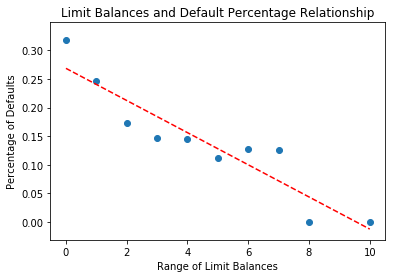

In [54]:
x = range_mean.index
y = range_mean['default.payment.next.month']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--" )
plt.title('Limit Balances and Default Percentage Relationship')
plt.xlabel('Range of Limit Balances')
plt.ylabel('Percentage of Defaults')
plt.show()

## Now, I will check if this is statiscally relevant by looking at two range data points. 

To avoid drastic results, I am avoiding points 8 and 10 with zero default rate and the first 1 with a really high default rate. 

From a T-Test, we can see that this is statistically relevant as the p-value is below 0.5

    P-Value = 1.123975393423431e-08
    
Asides from this, the graph also showa positive correlation between limit balances and default rates as in as limit balances goes up - default percentage goes down as shown by the trendline above. 

In [55]:
two_mean_lim = range_mean.iloc[2, 1]
two_size = range_size[2]
two_std_lim = range_sd.iloc[2,1]
print(two_mean_lim)
print(two_size)
print(two_std_lim)

0.17227574127361442
7993
0.37764355242207615


In [56]:
fiv_mean_lim = range_mean.iloc[5,0]
fiv_size = range_size[5]
fiv_std_lim = range_sd.iloc[5,0]
print(fiv_mean_lim)
print(fiv_size)
print(fiv_std_lim)

493805.55555555556
1080
14442.342194713427


In [57]:
two_range = limit_to_default.loc[limit_to_default['Range of Limits'] == 2, 'default.payment.next.month']
five_range = limit_to_default.loc[limit_to_default['Range of Limits'] == 5, 'default.payment.next.month']

In [58]:
from scipy.stats import ttest_ind
print(ttest_ind(two_range, five_range, equal_var = False))

Ttest_indResult(statistic=5.742404619379138, pvalue=1.123975393423431e-08)


# Question # 3: Can the bill amount perdict default rates? Is there a corelation between limit balances / bill amounts? 

To do this, I created a range of sum of bill amounts. To do so, I added all the bills (there are 6 of them) and then I created a range of bill amount by dividing rounding them to a whole number and dividing them by 300,000. This led to total of 18 ranges of bills and I grouped by the range of bills. I then graphed the relationship betwen range of bills and limit balances. I then found that limit balances are positively correlated to bill amount i.e. the higher the limit balance is - the more the bill amount is. 

## If we only look at range of bills till group 10, we can see that there is a slight trend that shows that default rate increase as sum of bills increase. 

After group 10, the default rate again goes to zero. But, from this we can possibly infer that there is negative correlation between the amount of bill and default rates (default rate will increase if there is a higher sum of bills)

I also took the top 1000 data points of the data and found the same trend. Although, we should note that there is no consistent trend of upwards default rate per bill amount. This could be due to the fact that we grouped the data points into ranges. 

Let's see if that is statistically relevant by picking the first and the last data point (0 and 10) and a few others:

0 Range v. 10 Range:

    P -Value : 0.11 (Not relevant) 

2 Range v. 9 Range: 

    P-Value: 0.29 (Not relevant) 
    
2 Range v. 10 Range: 

    P-Value: 0.07 (Not relevant) 
    
1 Range v. 10 Range:

    P-Value: 0.11 (Not relevant) 

In [59]:
bill_amt = cc_df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default.payment.next.month']]

In [60]:
bill_amt.describe()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,0.221200
std,129747.661567,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,0.415062
min,10000.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000
25%,50000.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,0.000000
50%,140000.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,0.000000
75%,240000.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,0.000000
max,1000000.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.000000


In [61]:
bill_amt = cc_df[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default.payment.next.month']].copy()

In [62]:
bill_amt['Sum of Bills'] = cc_df['BILL_AMT1'] + cc_df['BILL_AMT2']+ cc_df['BILL_AMT3']+ cc_df['BILL_AMT4'] + cc_df['BILL_AMT5']+ cc_df['BILL_AMT6']

In [63]:
bill_amt
bill_round = bill_amt['Sum of Bills'].abs()
range_of_bills = bill_round/300000
range_of_bills = range_of_bills.round()

In [64]:
bill_amt['Range of Bills'] = range_of_bills

In [65]:
bill_amt_mean = bill_amt.groupby('Range of Bills').mean()
bill_amt_mean
bill_amt_mean['Range of Bills'] = [0, 1, 2, 3 , 4, 5, 6, 7, 8, 9 , 10, 11, 12, 18]

In [66]:
range_zero = bill_amt.loc[bill_amt['Range of Bills'] == 0, 'default.payment.next.month']
range_ten = bill_amt.loc[bill_amt['Range of Bills'] == 10, 'default.payment.next.month']
range_two = bill_amt.loc[bill_amt['Range of Bills'] == 2, 'default.payment.next.month']
range_nine = bill_amt.loc[bill_amt['Range of Bills'] == 9, 'default.payment.next.month']
range_one = bill_amt.loc[bill_amt['Range of Bills'] == 1, 'default.payment.next.month']
range_zero = bill_amt.loc[bill_amt['Range of Bills'] == 0, 'default.payment.next.month']

from scipy.stats import ttest_ind
print(ttest_ind(range_zero, range_ten, equal_var = False))
from scipy.stats import ttest_ind
print(ttest_ind(range_two, range_nine, equal_var = False))
from scipy.stats import ttest_ind
print(ttest_ind(range_two, range_ten, equal_var = False))
from scipy.stats import ttest_ind
print(ttest_ind(range_one, range_ten, equal_var = False))

Ttest_indResult(statistic=-1.6787607570581793, pvalue=0.11044667262365873)
Ttest_indResult(statistic=-1.09603081146952, pvalue=0.2791647020696335)
Ttest_indResult(statistic=-1.8718535237270293, pvalue=0.07743050579005142)
Ttest_indResult(statistic=-1.6837265680864986, pvalue=0.10944208170116519)


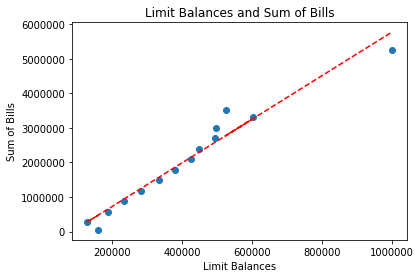

In [67]:
x = bill_amt_mean['LIMIT_BAL']
y = bill_amt_mean['Sum of Bills']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--" )
plt.title('Limit Balances and Sum of Bills')
plt.xlabel('Limit Balances')
plt.ylabel('Sum of Bills')
plt.show()

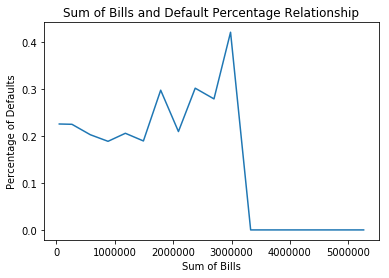

In [68]:
x = bill_amt_mean['Sum of Bills']
y = bill_amt_mean['default.payment.next.month']
plt.plot(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.title('Sum of Bills and Default Percentage Relationship')
plt.xlabel('Sum of Bills')
plt.ylabel('Percentage of Defaults')
plt.show()

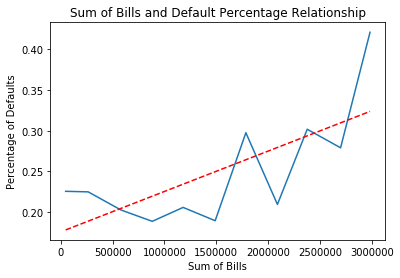

In [69]:
split_data = bill_amt_mean[0:10]
x = split_data['Sum of Bills']
y = split_data['default.payment.next.month']
plt.plot(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--" )
plt.title('Sum of Bills and Default Percentage Relationship')
plt.xlabel('Sum of Bills')
plt.ylabel('Percentage of Defaults')
plt.show()



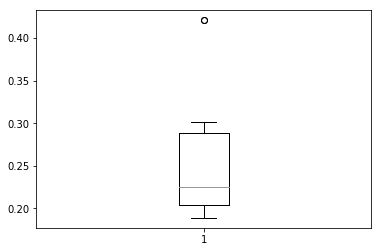

In [70]:
x = split_data['default.payment.next.month']
plt.boxplot(x)
plt.boxplot(y)
plt.show()


In [71]:
top = cc_df.head(1000)

In [72]:
top_bill = top[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default.payment.next.month']].copy()

In [73]:
top_bill['Sum of Bills'] = top['BILL_AMT1'] + top['BILL_AMT2']+ top['BILL_AMT3']+ top['BILL_AMT4'] + top['BILL_AMT5']+ top['BILL_AMT6']

In [74]:
top_bill
top_round = top_bill['Sum of Bills'].abs()
top_range = top_round/250000
top_range = top_range.round()
top_bill['Range of Bills'] = top_range
top_mean = top_bill.groupby('Range of Bills').mean()



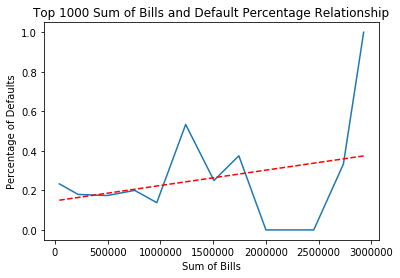

In [75]:
x = top_mean['Sum of Bills']
y = top_mean['default.payment.next.month']
plt.plot(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--" )
plt.title('Top 1000 Sum of Bills and Default Percentage Relationship')
plt.xlabel('Sum of Bills')
plt.ylabel('Percentage of Defaults')
plt.show()

# Questions for Further Analysis:

I think for further analysis, it would be interesting to look at a few other factors such as combination of various demographic factors together to see if that would impact default rates. Some questions I would pose in the future are:

1. How does combination of one or more social factor impact default rate? A female that is married / has a graduate degree vs. a male that is single and has a university degree? 

2. I would also like to evaluate the data in terms of payment delays. I think it would be interesting to see how much delayed payments impact default percentage. Does it get worse as the delays get further into the year? 

